# PCA con dataset Wine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

#### Cargo el dataset y lo analizo

In [21]:
from sklearn.datasets import load_wine
data = load_wine()

In [22]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [23]:
print('data.DESCR = ', data.DESCR)

data.DESCR =  .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0

In [5]:
print('data.feature_names = ', data.feature_names)
print('len(data.feature_names) = ', len(data.feature_names))
print('data.data = ',data.data)
print('data.data.shape = ',data.data.shape)
print('data.target_names = ', data.target_names)
print('data.target = ', data.target)
print('data.target.shape = ', data.target.shape)
print('data.frame = ', data.frame)

data.feature_names =  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
len(data.feature_names) =  13
data.data =  [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
data.data.shape =  (178, 13)
data.target_names =  ['class_0' 'class_1' 'class_2']
data.target =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [6]:
print('# class_0 = ',sum(data.target == 0))
print('# class_1 = ',sum(data.target == 1))
print('# class_2 = ',sum(data.target == 2))
print('sum =',59+71+48)

# class_0 =  59
# class_1 =  71
# class_2 =  48
sum = 178


El dataset consiste en 178 filas con 13 columnas. En data.target se encuentran las clases de cada vino: clase 0, 1 y 2.

### Reducción dimensional con PCA

Primero aplico StandardScaler y luego PCA.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.data)

In [26]:
print('X_scaled = ', X_scaled)


X_scaled =  [[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


In [20]:
data_c0=X_scaled[data.target == 0]
data_c1=X_scaled[data.target == 1]
data_c2=X_scaled[data.target == 2]

print(data_c0.shape)

(59, 13)


Hago algunas gráficas de los datos para ver cómo son.

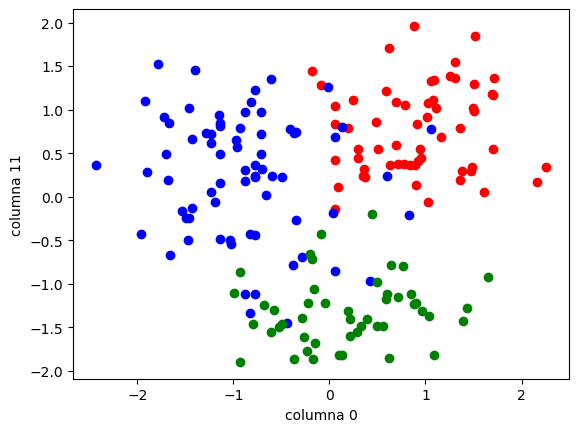

In [11]:
x1,x2=0,11
plt.scatter(data_c0[:,x1],data_c0[:,x2],c='red')
plt.scatter(data_c1[:,x1],data_c1[:,x2],c='blue')
plt.scatter(data_c2[:,x1],data_c2[:,x2],c='green')
plt.xlabel(f'columna {x1}')
plt.ylabel(f'columna {x2}')
plt.show()

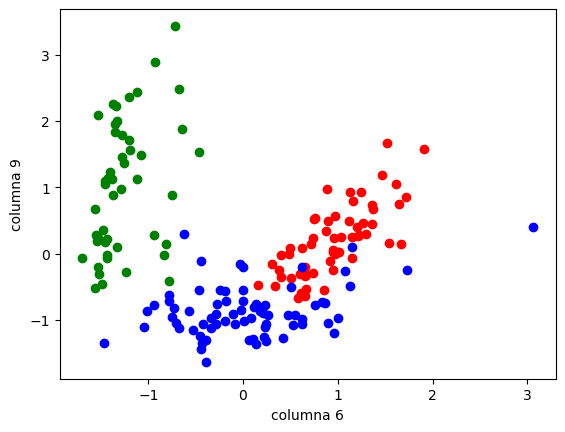

In [12]:
x1,x2=6,9
plt.scatter(data_c0[:,x1],data_c0[:,x2],c='red')
plt.scatter(data_c1[:,x1],data_c1[:,x2],c='blue')
plt.scatter(data_c2[:,x1],data_c2[:,x2],c='green')
plt.xlabel(f'columna {x1}')
plt.ylabel(f'columna {x2}')
plt.show()

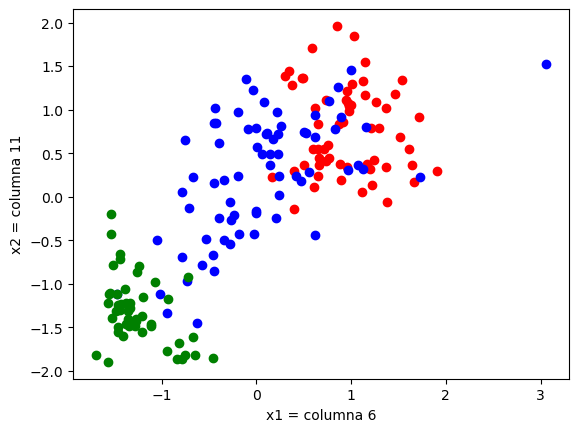

In [13]:
x1,x2=6,11
plt.scatter(data_c0[:,x1],data_c0[:,x2],c='red')
plt.scatter(data_c1[:,x1],data_c1[:,x2],c='blue')
plt.scatter(data_c2[:,x1],data_c2[:,x2],c='green')
plt.xlabel(f'x1 = columna {x1}')
plt.ylabel(f'x2 = columna {x2}')
plt.show()

A ojo no es fácil identificar las variables más importantes para identificar las clases.

Ahora aplico PCA.

In [14]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled,data.target)

In [40]:
X_pca.shape

(178, 13)

In [41]:
print('explained ratio =',pca.explained_variance_ratio_.round(3))

explained ratio = [0.362 0.192 0.111 0.071 0.066 0.049 0.042 0.027 0.022 0.019 0.017 0.013
 0.008]


[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


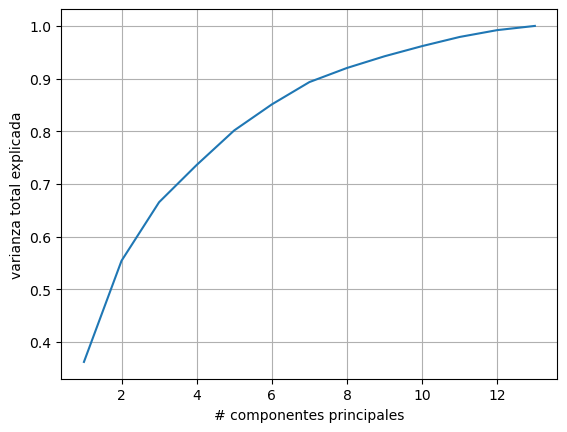

In [57]:
EVR = pca.explained_variance_ratio_
print(EVR.cumsum())
plt.plot(range(1,len(EVR)+1),EVR.cumsum())
plt.xlabel('# componentes principales')
plt.ylabel('varianza total explicada')
plt.grid()
plt.show()

Con las primeras 2 componentes se explica alrededor del 55% de la varianza. Vamos a usar estas dos primeras componentes y las graficamos.

Con 7 componentes se puede explicar alrededor del 90% de la varianza.

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled,data.target)
X_pca.shape

(178, 2)

In [34]:
data_c0=X_pca[data.target == 0]
data_c1=X_pca[data.target == 1]
data_c2=X_pca[data.target == 2]

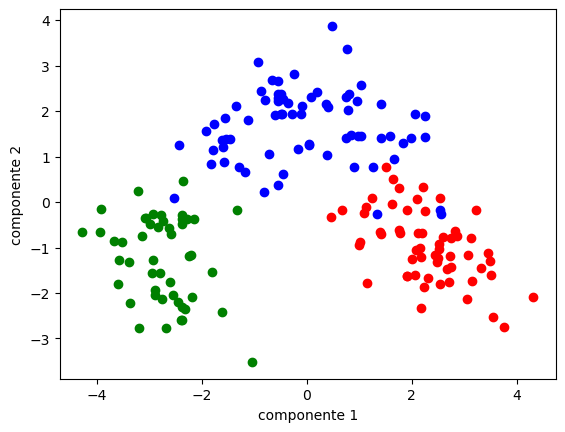

In [37]:
plt.scatter(data_c0[:,0],data_c0[:,1],c='red')
plt.scatter(data_c1[:,0],data_c1[:,1],c='blue')
plt.scatter(data_c2[:,0],data_c2[:,1],c='green')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.show()

Mediante estas dos componentes es posible separar bastante bien las clases. Si se agregaran más componentes se puede mejorar aún más.